# <font color="yellow">Remarks</font>
This notebook is a pytorch-implementation based on a Tutorial notebook on the tensorflow web site.

1.	Custom training: basics  |  TensorFlow. TensorFlow. https://www.tensorflow.org/tutorials/eager/custom_training. Published December 17, 2018. Accessed December 29, 2018.

You can find some more insformation on eager execution, also on Tensorflow's website:
2.	Eager Execution  |  TensorFlow. TensorFlow. https://www.tensorflow.org/guide/eager. Published December 12, 2018. Accessed December 29, 2018.



<font color="yellow">We have marked sections that have differences with the original workbook in yellow</font>.
    
Author: H. Felix Wittmann
hfwittmann@gmail.com

There is no association between the author and Tensorflow.


In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Custom training: basics

In [2]:
import torch
assert torch.tensor(1.0) == 1.0, "Converting 1.0 to torch tensor, should match"
assert torch.tensor(1.0).numpy() == 1.0, "Converting 1.0 to torch tensor, then back to numpy, should match"

##  <font color='yellow'> Define torch model </font>

In [3]:
class Net(torch.nn.Module):
    def __init__(self: torch.nn):
        super(Net, self).__init__()
        
        
        mylayer = torch.nn.Linear(1,1)
        # initialise values .. to make results deterministic
        mylayer.bias = torch.nn.Parameter(torch.tensor([0.0]))
        mylayer.weight = torch.nn.Parameter(torch.tensor([[5.0]]))
        
        self.net = torch.nn.Sequential(
            mylayer
        )      
    
    def forward(self: torch.nn, x):
        return self.net(x)


###  <font color='yellow'> Check initialisation </font>

In [4]:
myNet = Net()
# https://discuss.pytorch.org/t/how-to-print-models-parameters-with-its-name-and-requires-grad-value/10778
for name, param in myNet.named_parameters():
    if param.requires_grad:
        print (name, param.data)

net.0.weight tensor([[5.]])
net.0.bias tensor([0.])


### <font color='yellow'>Obtain training data</font>

Let's synthesize the training data with some noise.

In [5]:
import numpy as np
nOfDatapoints = 1000
W_TRUE, b_TRUE = 3.0, 2.0
np.random.seed(314)
inputs = np.random.normal(size=nOfDatapoints)
noise = np.random.normal(size=nOfDatapoints)
outputs = W_TRUE * inputs + b_TRUE + noise

### <font color='yellow'>Split into train/test</font>

In [6]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, outputs_train, outputs_test = \
    train_test_split(inputs, outputs, test_size=0.33, random_state=42)
# outputs = outputs.reshape(-1,1)  # reshape to match keras output

In [7]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

plt.scatter(inputs,outputs,c='b', alpha=0.5, label='Data')
plt.scatter(inputs_train, outputs_train, c='y', alpha=0.2, label='Train')
plt.scatter(inputs_test, outputs_test, c='g', alpha=0.2, label='Test')
plt.legend()## Explore data und Model

### <font color='yellow'>Explore data und Model before training</font>

Before we train the model let's visualize where the model stands right now. We'll plot the model's predictions in black and the testting data in blue.

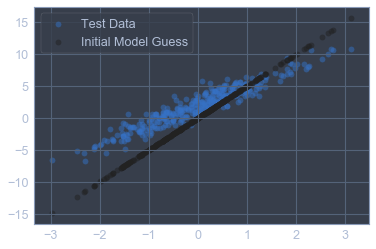

In [20]:
mynet = Net()

prediction_test = mynet(torch.Tensor([inputs_test]).transpose_(0, 1)).detach().numpy()
plt.scatter(inputs_test, outputs_test, c = 'b', alpha=0.5, label = 'Test Data')
plt.scatter(inputs_test, prediction_test, c = 'k', alpha=0.5, label = 'Initial Model Guess')
plt.legend()
plt.show()

# Set up loss function

In [21]:
from tensorboardX import SummaryWriter

objective = torch.nn.MSELoss(reduce=True)
optimizer = torch.optim.SGD(params=mynet.parameters(), lr=0.1)
writer = SummaryWriter(comment='-regression-tutorial')

### Check

In [22]:
prediction_v = mynet( torch.Tensor([inputs_test]).transpose_(0,1))
outputs_v = torch.Tensor([outputs_test]).transpose_(0,1)
objective(prediction_v, outputs_v), ((outputs_v- prediction_v)**2).mean(), ((outputs_test.reshape(-1,1)- prediction_test)**2).mean()

(tensor(9.3949, grad_fn=<MseLossBackward>),
 tensor(9.3949, grad_fn=<MeanBackward1>),
 9.394942704256383)

# Do optimisation

In [23]:
batchsize = len(inputs_train)
epochs = 10
for ix in range(epochs):
    optimizer.zero_grad()
    prediction_v = mynet( torch.Tensor([inputs_train]).transpose_(0,1))
    outputs_v = torch.Tensor([outputs_train]).transpose_(0,1)
    
    loss_v = objective(prediction_v, outputs_v)
    loss_v.backward()
    optimizer.step()
    
    print("%d: loss=%.3f" % (ix, loss_v.item()))
    writer.add_scalar('loss', loss_v.item(), ix)
    
    

0: loss=9.306
1: loss=6.285
2: loss=4.368
3: loss=3.151
4: loss=2.379
5: loss=1.889
6: loss=1.578
7: loss=1.380
8: loss=1.255
9: loss=1.175


### <font color='yellow'>Explore data und Model after training</font>

Before we train the model let's visualize where the model stands right now. We'll plot the model's predictions in black and the testting data in blue.

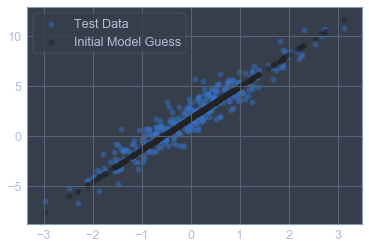

In [24]:
prediction_test = mynet(torch.Tensor([inputs_test]).transpose_(0, 1)).detach().numpy()
plt.scatter(inputs_test, outputs_test, c = 'b', alpha=0.5, label = 'Test Data')
plt.scatter(inputs_test, prediction_test, c = 'k', alpha=0.5, label = 'Initial Model Guess')
plt.legend()
plt.show()